In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head

<bound method NDFrame.head of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

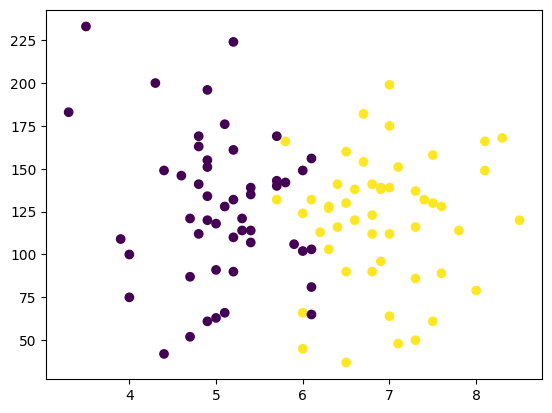

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [17]:
 X = df.iloc[:,0:2]
 y = df.iloc[:,-1]

In [18]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [25]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [29]:
x_train

,cgpa,iq
53,8.3,168.0
92,5.2,110.0
78,6.1,81.0
13,6.4,116.0
7,5.0,63.0
...,...,...
96,4.4,42.0
67,5.0,118.0
64,7.0,64.0
47,5.2,161.0


In [30]:
y_train

,placement
53,1
92,0
78,0
13,1
7,0
...,...
96,0
67,0
64,1
47,0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
 x_train = scaler.fit_transform(x_train)

In [35]:
x_train

array([[ 2.00308668e+00,  1.24073424e+00],
       [-7.16432461e-01, -2.90022729e-01],
       [ 7.31053532e-02, -1.05540121e+00],
       [ 3.36284625e-01, -1.31668559e-01],
       [-8.91885309e-01, -1.53046372e+00],
       [ 1.38900171e+00,  1.85039779e-01],
       [-9.79611733e-01, -2.60991131e-02],
       [-1.15506458e+00,  2.93248462e-04],
       [-1.46210706e-02,  7.39279372e-01],
       [ 7.31053532e-02,  9.24025903e-01],
       [ 6.87190320e-01,  5.28140479e-01],
       [-1.46210706e-02, -5.01161621e-01],
       [ 1.21354886e+00,  2.90609225e-01],
       [ 7.31053532e-02,  2.90609225e-01],
       [-1.46210706e-02, -1.45128664e+00],
       [ 5.11737472e-01,  4.48963395e-01],
       [-2.77800342e-01,  5.80925202e-01],
       [ 1.60831777e-01, -2.10845644e-01],
       [ 4.24011048e-01, -2.21666512e+00],
       [-9.79611733e-01,  8.97633541e-01],
       [ 7.74916744e-01,  4.75355756e-01],
       [-9.79611733e-01,  1.97972036e+00],
       [ 1.12582244e+00, -9.23439406e-01],
       [-1.

In [36]:
x_test = scaler.transform(x_test)

In [37]:
x_test

array([[ 8.62643167e-01,  2.05889745e+00],
       [-8.04158885e-01,  1.85039779e-01],
       [-6.28706037e-01,  2.93248462e-04],
       [ 1.56445456e+00, -1.84453282e-01],
       [-1.06733816e+00,  1.26712660e+00],
       [ 6.87190320e-01, -2.37238005e-01],
       [-7.16432461e-01,  2.71870649e+00],
       [-9.79611733e-01, -1.58324844e+00],
       [ 3.36284625e-01,  5.28140479e-01],
       [-1.50597028e+00,  2.08528981e+00]])

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [40]:
clf.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred = clf.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

<Axes: >

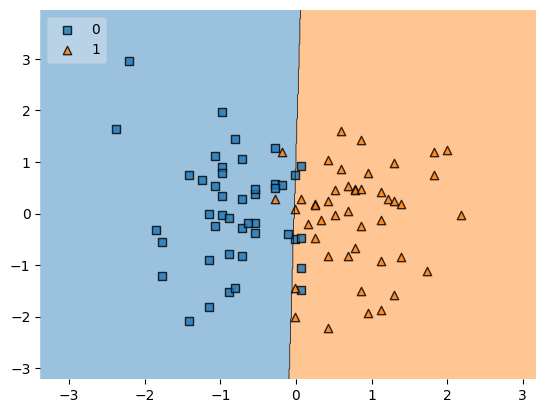

In [50]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend = 2) # Use clf instead of svm

In [52]:
import pickle

In [53]:
pickle.dump(clf,open('model.pkl','wb'))